# PCA demo

Uses PCA from sklearn.decomposition: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Author: Nick Forsch <br>
Last edit: 2019-06-24

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns; sns.set()

## PCA demo using QRS complexes

### Load and plot ECG data
Size is *N x P* for N QRS measurements and P points per measurement

Data contains 498 measurements of 1892 features (value of voltage for each time point)


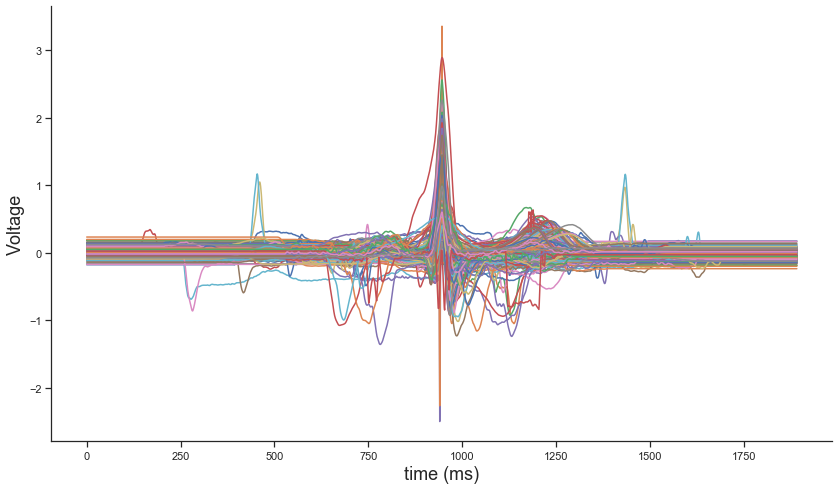

In [2]:
fname = '/Users/nick/CMRG/Projects/pca_demo/ecg_pca_data.npy'
X = np.load(fname)
print('Data contains %d measurements of %d features (value of voltage for each time point)' %(X.shape[0],X.shape[1]))

plt.figure(figsize=(14,8))
with sns.axes_style('ticks'):
    for qrs in X:
        plt.plot(qrs)
        plt.xlabel('time (ms)', FontSize=18)
        plt.ylabel('Voltage', FontSize=18)
        sns.despine()

### Set up & run PCA

Resulting components matrix is *M x P* for M components and P features.

In [3]:
pca = PCA(n_components=10)
X_train = X
pca.fit(X_train) # fit trains the PCA
singvals = pca.singular_values_
components = np.array(pca.components_)

# pca.explained_variance_
# pca.explained_variance_ratio_
# pca.components_
# pca.mean_

ncomp = components.shape[0]
nfeat = components.shape[1]
print('Number of features: %d' %nfeat)
print('Number of components: %d' %ncomp)


Number of features: 1892
Number of components: 10


### Analyze results: Variance explained

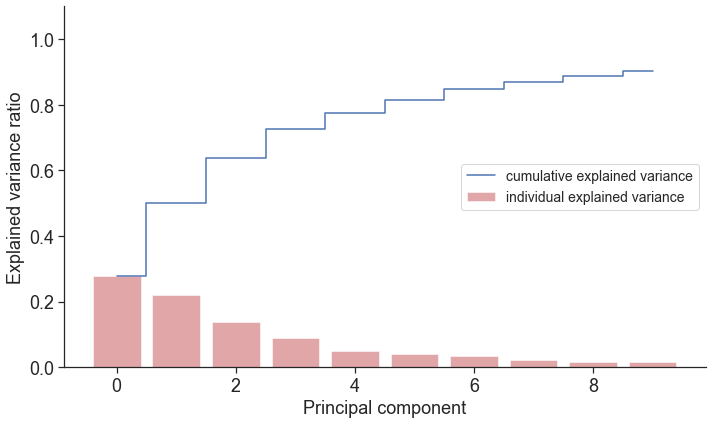

In [4]:
# Explained variance
X_variance = np.cumsum(pca.explained_variance_ratio_)
component_number = np.arange(len(X_variance))

with sns.axes_style('ticks'):
    plt.figure(figsize=(10, 6))
    axis_font = {'size':'18'}
    plt.bar(component_number, pca.explained_variance_ratio_,
            color='r',alpha=0.5, align='center', label='individual explained variance')
    plt.step(component_number, X_variance,
             where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio', **axis_font)
    plt.xlabel('Principal component', **axis_font)
    plt.xticks(**axis_font)
    plt.yticks(**axis_font)
    plt.legend(loc='center right', prop={'size':14})
    plt.ylim((0,1.1))
    plt.tight_layout()
    sns.despine()

## Reconstruct observation from atlas components

reconstruct = *mu* + (*weight*) \* (*components*)

Check matrix multiplication to get shape of original data
$$(1\times P) = (1\times P) + (1\times M)\cdot(M\times P)$$

### Plot ECG function

In [5]:
def plot_ecg( compNum, mean, recon5th, recon95th ):
    with sns.axes_style('ticks'):
        plt.figure(2, figsize=(14,6))
        plt.plot(mean)
        plt.plot(recon5th)
        plt.plot(recon95th)
        plt.xlabel('time (ms)', FontSize=18)
        plt.ylabel('Voltage', FontSize=18)
        plt.legend(['Mean',
                    'Component '+np.str(compNum)+', 5th percentile',
                    'Component '+np.str(compNum)+', 95th percentile'
                   ]);
        sns.despine()

### Reconstruct and plot

Shape of X_pcs: (498,10)


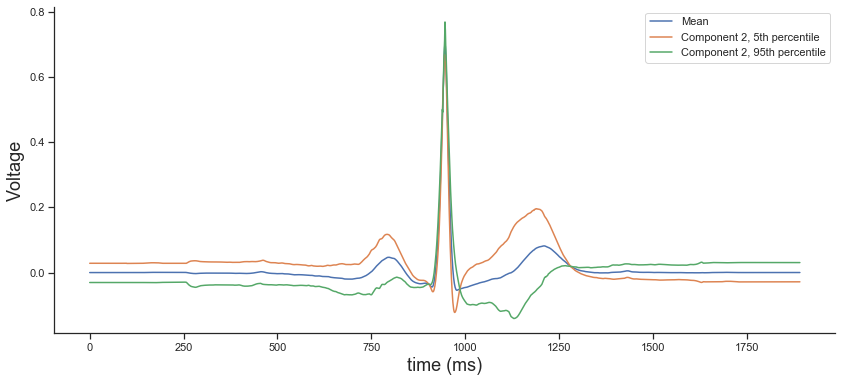

In [8]:
# Convert original data to PCA space
X_pcs = pca.transform(X)
print('Shape of X_pcs: (%d,%d)' %(X_pcs.shape[0],X_pcs.shape[1]))

# Using percentiles of a sample population, X
percentiles = (5,50,95)
X_percentiles = np.percentile(X_pcs, percentiles, axis=0)

# recon_5th = pca.inverse_transform(X_percentiles[0])
# recon_50th = pca.inverse_transform(X_percentiles[1])
# recon_95th = pca.inverse_transform(X_percentiles[2])
# recon_test = pca.mean_ + np.dot(X_50th,components) # should be same as pca.inverse_transform()

# +++ SET THIS +++
comp = [2]

d_5 = X_percentiles[0][comp]
d_95 = X_percentiles[2][comp]
recon_5th = pca.mean_ + np.dot(d_5,components[comp])
recon_95th = pca.mean_ + np.dot(d_95,components[comp])
recon_mean = pca.mean_

plot_ecg( comp[0], pca.mean_, recon_5th, recon_95th )


## PCA skeleton

This is how sklearn.decomposition.PCA is generally used

In [ ]:
# Data
X_train = []
X_sample = []

# PCA
pca = PCA(n_components=2)
pca.fit(X_train)
# pca.explained_variance_
# pca.explained_variance_ratio_
# pca.components_
# pca.mean_
# pca.singular_values_

# Transform sample data
sample_weights = pca.transform(X_sample)

# Recreate from component weights
X_recreate = pca.mean_ + sample_weights.dot(pca.components_)
# OR
# X_recreate = pca.inverse_transform(sample_weights)


## Simple PCA demo

Portions of code adapted from: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

- Create sample dataset (x1,x2) <br>
- Run PCA on data <br>
- Plot original data and transformed data

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    

Create a sample dataset (x,y) with a nearly linear relationship.

In [ ]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('original data')

Run PCA on data

In [ ]:
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

Compare original data to transformed data

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))